# Simulation of Anti-cancer Drugs in Biological Membranes

<p style='text-align: justify;'> 
Cancer is one of the most important health concerns that has no boundary, influences any organ and kills millions of people every year. Distinct characteristics of cancer cells such as adaptation to environmental selection forces and resistance to chemo-/radiotherapy are the major causes of frequent failures in cancer treatment. 
Despite of extensive research and progress in the field of drug design for cancer therapy, cancer is still a leading causes of death worldwide. To enhance the efficiency of anti-cancer drugs, it is most important to design the effective drugs. In order to design effective anti-cancer drugs based on development of cancer cells, first we should study the details of interactions with anti-cancer drug and the components of membrane. In this work, we use all-atom Molecular Dynamics simulations to investigate the interaction between anti-cancer drugs and different membrane models using umbrella sampling and thermodynamic integration.

# QM Partial Charges

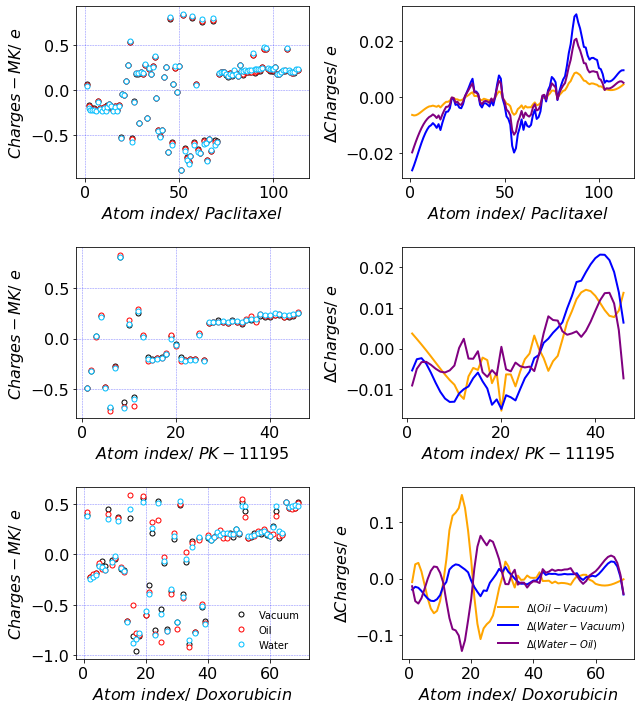

In [66]:
#gaussian/
#analysis.ipynb
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os.path, os
import seaborn as sns
from copy import deepcopy
import pandas as pd
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline
import scipy as sp
from scipy.signal import savgol_filter
file = 'Polarization-Partial charges.xlsx'
TDYP0= pd.read_excel(file,usecols=[1], sheet_name='Doxorubicin').dropna()
TDYP1= pd.read_excel(file,usecols=[2], sheet_name='Doxorubicin').dropna()
TDYP2= pd.read_excel(file,usecols=[3], sheet_name='Doxorubicin').dropna()
TDYP3= pd.read_excel(file,usecols=[4], sheet_name='Doxorubicin').dropna()
TDYP11= pd.read_excel(file,usecols=[5], sheet_name='Doxorubicin').dropna()
TDYP22= pd.read_excel(file,usecols=[6], sheet_name='Doxorubicin').dropna()
TDYP33= pd.read_excel(file,usecols=[7], sheet_name='Doxorubicin').dropna()
TDYP4= pd.read_excel(file,usecols=[2], sheet_name='PK-11195').dropna()
TDYP5= pd.read_excel(file,usecols=[3], sheet_name='PK-11195').dropna()
TDYP6= pd.read_excel(file,usecols=[4], sheet_name='PK-11195').dropna()
TDYP44= pd.read_excel(file,usecols=[5], sheet_name='PK-11195').dropna()
TDYP55= pd.read_excel(file,usecols=[6], sheet_name='PK-11195').dropna()
TDYP66= pd.read_excel(file,usecols=[7], sheet_name='PK-11195').dropna()
TDYP7= pd.read_excel(file,usecols=[2], sheet_name='Paclitaxel').dropna()
TDYP8= pd.read_excel(file,usecols=[3], sheet_name='Paclitaxel').dropna()
TDYP9= pd.read_excel(file,usecols=[4], sheet_name='Paclitaxel').dropna()
TDYP77= pd.read_excel(file,usecols=[5], sheet_name='Paclitaxel').dropna()
TDYP88= pd.read_excel(file,usecols=[6], sheet_name='Paclitaxel').dropna()
TDYP99= pd.read_excel(file,usecols=[7], sheet_name='Paclitaxel').dropna()
TDYP00= pd.read_excel(file,usecols=[1], sheet_name='PK-11195').dropna()
TDYP000= pd.read_excel(file,usecols=[1], sheet_name='Paclitaxel').dropna()
t0 = np.array(TDYP11).T
t1 =np.array( TDYP22).T
t2 =np.array (TDYP33).T
t3 = np.array(TDYP44).T
t4 = np.array(TDYP55).T
t5 =np.array( TDYP66).T
t6 =np.array (TDYP77).T
t7 =np.array( TDYP88).T
t8 =np.array (TDYP99).T


yhat1 = savgol_filter(t0, 19, 4).T 
yhat2 = savgol_filter(t1, 19, 4).T
yhat3 = savgol_filter(t2, 19, 4).T
yhat4 = savgol_filter(t3, 19, 4).T
yhat5 = savgol_filter(t4, 19, 4).T
yhat6 = savgol_filter(t5, 19, 4).T
yhat7 = savgol_filter(t6, 19, 4).T
yhat8 = savgol_filter(t7, 19, 4).T
yhat9 = savgol_filter(t8, 19, 4).T

c0=t0.T.flatten()
c1=t1.T.flatten()
c2=t2.T.flatten()
c3=t3.T.flatten()
c4=t4.T.flatten()
c5=t5.T.flatten()
c6=t6.T.flatten()
c7=t7.T.flatten()
c8=t8.T.flatten()

plt.rcParams.update({'font.size': 16, 'figure.figsize': [10, 12]})
fig, ax = plt.subplots(3, 2)


ax[0,0].plot(TDYP000,TDYP7,color='white',label="Vacuum",marker="o",linewidth=0,markersize=5,markeredgecolor="black")
ax[0,0].plot(TDYP000,TDYP8,color='white',label="Oil",marker="o",linewidth=0,markersize=5,markeredgecolor="red")
ax[0,0].plot(TDYP000,TDYP9,color='white',label="Water",marker="o",linewidth=0,markersize=5,markeredgecolor="deepskyblue")

ax[0,0].set_xlabel(r'$Atom\ index/\ Paclitaxel$')
ax[0,0].set_ylabel(r'$Charges-MK/\ e$ ', color="black")
ax[0,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)


ax[0,1].plot(TDYP000,yhat7,color='orange',label="$\Delta(Oil-Vacuum)$",linewidth=2)
ax[0,1].plot(TDYP000,yhat8,color='blue',label="$\Delta(Water-Vacuum)$",linewidth=2)
ax[0,1].plot(TDYP000,yhat9,color='purple',label="$\Delta(Water-Oil)$",linewidth=2)

ax[0,1].set_xlabel(r'$Atom\ index/\ Paclitaxel$')
ax[0,1].set_ylabel(r'$\Delta Charges/\ e$ ',  color="black")


ax[1,0].plot(TDYP00,TDYP4,color='white',label="Vacuum",marker="o",linewidth=0,markersize=5,markeredgecolor="black")
ax[1,0].plot(TDYP00,TDYP5,color='white',label="Oil",marker="o",linewidth=0,markersize=5,markeredgecolor="red")
ax[1,0].plot(TDYP00,TDYP6,color='white',label="Water",marker="o",linewidth=0,markersize=5,markeredgecolor="deepskyblue")

ax[1,0].set_xlabel(r'$Atom\ index/\ PK-11195$')
ax[1,0].set_ylabel(r'$Charges-MK/\ e$ ', color="black")
ax[1,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

ax[1,1].plot(TDYP00,yhat4,color='orange',label="$\Delta(Oil-Vacuum)$",linewidth=2)
ax[1,1].plot(TDYP00,yhat5,color='blue',label="$\Delta(Water-Vacuum)$",linewidth=2)
ax[1,1].plot(TDYP00,yhat6,color='purple',label="$\Delta(Water-Oil)$",linewidth=2)

ax[1,1].set_xlabel(r'$Atom\ index/\ PK-11195$')
ax[1,1].set_ylabel(r'$\Delta Charges/\ e$ ',  color="black")

ax[2,0].plot(TDYP0,TDYP1,color='white',label="Vacuum",marker="o",linewidth=0,markersize=5,markeredgecolor="black")
ax[2,0].plot(TDYP0,TDYP2,color='white',label="Oil",marker="o",linewidth=0,markersize=5,markeredgecolor="red")
ax[2,0].plot(TDYP0,TDYP3,color='white',label="Water",marker="o",linewidth=0,markersize=5,markeredgecolor="deepskyblue")
ax[2,0].legend(loc=4, fontsize=10,frameon=False)


ax[2,0].set_xlabel(r'$Atom\ index/\ Doxorubicin$')
ax[2,0].set_ylabel(r'$Charges-MK/\ e$ ',  color="black")
ax[2,0].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

ax[2,1].plot(TDYP0,yhat1,color='orange',label="$\Delta(Oil-Vacuum)$",linewidth=2)
ax[2,1].plot(TDYP0,yhat2,color='blue',label="$\Delta(Water-Vacuum)$",linewidth=2)
ax[2,1].plot(TDYP0,yhat3,color='purple',label="$\Delta(Water-Oil)$",linewidth=2)
ax[2,1].legend(loc=4, fontsize=10,frameon=False)
ax[2,1].set_xlabel(r'$Atom\ index/\ Doxorubicin$')
ax[2,1].set_ylabel(r'$\Delta Charges/\ e$ ', color="black")



plt.subplots_adjust(wspace=0.4, hspace=0.4)  
plt.savefig('charge-MK.pdf', bbox_inches='tight', dpi=300)



# Solvation Free Energy in Water

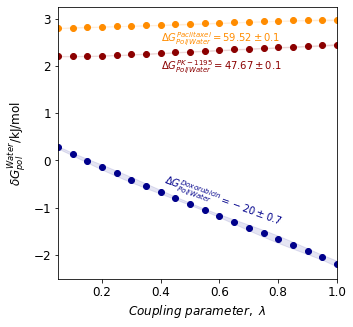

In [1]:
#Thermodynamic Integration in Water
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os.path, os
from copy import deepcopy
import pandas as pd
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline
import scipy as sp
from scipy.signal import savgol_filter
file='Polarization-TI.xlsx'
TDYP1= pd.read_excel(file,usecols=[1], sheet_name='TD-MK').dropna()
TDYP2= pd.read_excel(file,usecols=[2], sheet_name='TD-MK').dropna()
E2= pd.read_excel(file,usecols=[3], sheet_name='TD-MK').dropna()
TDYP6= pd.read_excel(file,usecols=[6], sheet_name='TD-MK').dropna()
E3= pd.read_excel(file,usecols=[7], sheet_name='TD-MK').dropna()
TDYP10= pd.read_excel(file,usecols=[10], sheet_name='TD-MK').dropna()
E4= pd.read_excel(file,usecols=[11], sheet_name='TD-MK').dropna()

t1 = TDYP1.transpose()
t2 = TDYP2.transpose()
t3 = TDYP6.transpose()
t4 = TDYP10.transpose()
e2=E2.T
e3=E3.T
e4=E4.T


yhat1 = savgol_filter(t2, 19, 4)
yhat12 = savgol_filter(t3, 19, 4)
yhat13 = savgol_filter(t4, 19, 4)

yhat = savgol_filter(t2, 19, 4).T
yhat2 = savgol_filter(t3, 19, 4).T
yhat3 = savgol_filter(t4, 19, 4).T

plt.rcParams.update({'font.size': 12, 'figure.figsize': [5, 5]})
fig, ax = plt.subplots()
x1=np.array(yhat12-e3).T
x11=np.array(yhat1-e2).T
x111=np.array(yhat13-e4).T
x2=np.array(yhat12+e3).T
x22=np.array(yhat1+e2).T
x222=np.array(yhat13+e4).T
x3=np.array(TDYP1)
x3=x3.flatten()
x1=x1.flatten()
x2=x2.flatten()
x11=x11.flatten()
x22=x22.flatten()
x111=x111.flatten()
x222=x222.flatten()

x1=savgol_filter(x1, 19, 4)
x2=savgol_filter(x2, 19, 4)
x11=savgol_filter(x11, 19, 6)
x22=savgol_filter(x22, 19, 6)
x111=savgol_filter(x111, 19, 6)
x222=savgol_filter(x222, 19, 6)


ax.set_xlim([0.05, 1])


ax.plot(x3, yhat3, color="darkblue", label=r"$\mathrm{Doxorubicin/water-MK}$",linewidth=0.00,marker="o",markersize=6)  
ax.fill_between(x3,x222, x111,alpha=0.1,color="darkblue")
ax.plot(x3, yhat2, color="darkred", label=r"$\mathrm{PK-11195/water-MK}$",linewidth=0.00,marker="o",markersize=6) 
ax.fill_between(x3,x2, x1,alpha=0.1,color="darkred")
ax.plot(x3, yhat, color="darkorange", label=r"$\mathrm{Paclitaxel/water-MK}$",linewidth=0.00,marker="o",markersize=6) 
ax.fill_between(x3,x22, x11, alpha=0.1,color="darkorange")



ax.text(0.4, 2.5, r'$\Delta G^{Paclitaxel}_{Pol/Water}=59.52\pm 0.1$', fontsize='small', color="darkorange")
ax.text(0.4, 1.9, r'$\Delta G^{PK-1195}_{Pol/Water}=47.67\pm 0.1$', fontsize='small',color="darkred")
ax.text(0.4, -1.4, r'$\Delta G^{Doxorubicin}_{Pol/Water}=-20\pm 0.7$', fontsize='small', color="darkblue", rotation="-20")

ax.set_xlabel(r'$Coupling\ parameter,\ \lambda$')
ax.set_ylabel(r'$\delta G^{Water} _{pol}/{\mathrm{kJ/mol}}$ ',  color="black")

  
plt.savefig('td-p-mmkk-j.pdf', bbox_inches='tight', dpi=300)


# Solvation Free Energy in Membrane

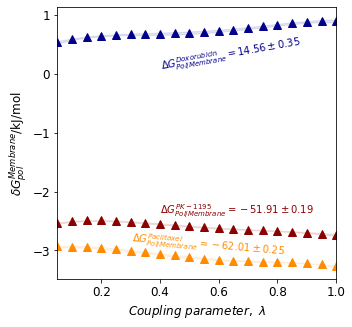

In [2]:
#Thermodynamic Integration in Membrane
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os.path, os
from copy import deepcopy
import pandas as pd
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline
import scipy as sp
from scipy.signal import savgol_filter



file='Polarization-TI-Membrane.xlsx'
aTDYP1= pd.read_excel(file,usecols=[0]).dropna()

aTDYP100= pd.read_excel(file,usecols=[4]).dropna()
aE40= pd.read_excel(file,usecols=[5]).dropna()
aTDYP2= pd.read_excel(file,usecols=[7]).dropna()
aE2= pd.read_excel(file,usecols=[8]).dropna()

aTDYP10= pd.read_excel(file,usecols=[10]).dropna()
aE4= pd.read_excel(file,usecols=[11]).dropna()


aTDYP1000= pd.read_excel(file,usecols=[16]).dropna()
aE400= pd.read_excel(file,usecols=[17]).dropna()

at1 = aTDYP1.transpose()
at2 = aTDYP2.transpose()
at4 = aTDYP10.transpose()
ae2=aE2.T

at40 = aTDYP100.transpose()
at400 = aTDYP1000.transpose()
ae4=aE4.T
ae40=aE40.T
ae400=aE400.T

ayhat1 = savgol_filter(at2, 19, 4)

ayhat13 = savgol_filter(at4, 19, 4)
ayhat130 = savgol_filter(at40, 19, 4)
ayhat1300 = savgol_filter(at400, 19, 4)
ayhat = savgol_filter(at2, 19, 4).T

ayhat3 = savgol_filter(at4, 19, 4).T
ayhat30 = savgol_filter(at40, 19, 4).T
ayhat300 = savgol_filter(at400, 19, 4).T



ac18=ayhat1.flatten()

ac38=ayhat13.flatten()


ax11=np.array(ayhat1-ae2).T
ax111=np.array(ayhat13-ae4).T

ax22=np.array(ayhat1+ae2).T
ax222=np.array(ayhat13+ae4).T
ax3=np.array(aTDYP1)
ax3=ax3.flatten()

ax2220=np.array(ayhat130+ae40).T
ax22200=np.array(ayhat1300+ae400).T
ax1110=np.array(ayhat130-ae40).T
ax11100=np.array(ayhat1300-ae400).T
ax11=ax11.flatten()
ax22=ax22.flatten()
ax111=ax111.flatten()
ax222=ax222.flatten()

ax2220=ax2220.flatten()
ax22200=ax22200.flatten()

ax1110=ax1110.flatten()
ax11100=ax11100.flatten()

ax11=savgol_filter(ax11, 19, 4)
ax22=savgol_filter(ax22, 19, 4)
ax111=savgol_filter(ax111, 19, 4)
ax222=savgol_filter(ax222, 19, 4)
ax2220=savgol_filter(ax2220, 19, 4)
ax22200=savgol_filter(ax22200, 19, 4)
ax1110=savgol_filter(ax1110, 19, 4)
ax11100=savgol_filter(ax11100, 19, 4)

plt.rcParams.update({'font.size': 12, 'figure.figsize': [5, 5]})
fig, ax = plt.subplots()
ax.plot(ax3, ayhat3, color="darkorange", label=r"$\mathrm{Paclitaxel/DLPC-MK}$",linewidth=0.00,marker="^",markerfacecolor="darkorange",markersize=8)  
ax.fill_between(ax3,ax222, ax111,alpha=0.1,color="darkorange")

ax.plot(ax3, ayhat30, color="darkblue", label=r"$\mathrm{Paclitaxel/DLPC-MK}$",linewidth=0.00,marker="^",markerfacecolor="darkblue",markersize=8)  
ax.fill_between(ax3,ax2220, ax1110,alpha=0.1,color="darkblue")

ax.plot(ax3, ayhat300, color="darkred", label=r"$\mathrm{Paclitaxel/DLPC-MK}$",linewidth=0.00,marker="^",markerfacecolor="darkred",markersize=8)  
ax.fill_between(ax3,ax22200, ax11100,alpha=0.1,color="darkred")


ax.text(0.3, -3.09, r'$\Delta G^{Paclitaxel}_{Pol/Membrane}=-62.01\pm 0.25$', fontsize='small', color="darkorange", rotation="-5")
ax.text(0.4, -2.4, r'$\Delta G^{PK-1195}_{Pol/Membrane}=-51.91\pm 0.19$', fontsize='small',color="darkred")
ax.text(0.4, .05, r'$\Delta G^{Doxorubicin}_{Pol/Membrane}=14.56\pm 0.35$', fontsize='small', color="darkblue", rotation="10")

ax.set_xlabel(r'$Coupling\ parameter,\ \lambda$')
ax.set_ylabel(r'$\delta G^{Membrane} _{pol}/{\mathrm{kJ/mol}}$ ',  color="black")
ax.set_xlim([0.05, 1])
  
plt.savefig('td-p-mmkk-m-j.pdf', bbox_inches='tight', dpi=300)


# Translocation Free Energy with Different Partial Charges in Vacuum, Oil, and Water

In [69]:
#Umbrella sampling 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os.path, os
from copy import deepcopy
from scipy.interpolate import UnivariateSpline
import pandas as pd
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10, 10]})

import matplotlib.pyplot as plt
import numpy as np

In [70]:
file = 'Polarization-US.xlsx'
def loadLipid(file, col, sheet):
    return dict(
        gas = [pd.read_excel(file, usecols=[col,col+1], names=['r','G'], sheet_name=sheet, header=None).dropna(),
               pd.read_excel(file, usecols=[col+3,col+4], names=['r','G'], sheet_name=sheet, header=None).dropna()],
         oil = [pd.read_excel(file, usecols=[col+6,col+7], names=['r','G'], sheet_name=sheet, header=None).dropna(),
               pd.read_excel(file, usecols=[col+9,col+10], names=['r','G'], sheet_name=sheet, header=None).dropna()],
        water = [pd.read_excel(file, usecols=[col+12,col+13], names=['r','G'], sheet_name=sheet, header=None).dropna(), 
                 pd.read_excel(file, usecols=[col+15,col+16], names=['r','G'], sheet_name=sheet, header=None).dropna()],
        d = [pd.read_excel(file, usecols=[col+18,col+19], names=['r','G'], sheet_name=sheet, header=None).dropna(), 
                 pd.read_excel(file, usecols=[col+21,col+22], names=['r','G'], sheet_name=sheet, header=None).dropna()])

def thermodynamicIntegration(file, col, sheet):
    return pd.read_excel(file, usecols=[col,col+1], names=['dG', 'error'],
                         sheet_name=sheet, header=None).dropna()


db = {}
db["Paclitaxel"] = {}
db["Paclitaxel"]["TD"] = thermodynamicIntegration(file, 2, "TD-MK")
db["Paclitaxel"]["PMF"] = {}
db["Paclitaxel"]["PMF"]["DLPC"] = loadLipid(file, 1, "paclitaxel-mk")
db["Paclitaxel"]["PMF"]["DPPC"] = loadLipid(file, 25, "paclitaxel-mk")
db["Paclitaxel"]["PMF"]["POPC"] = loadLipid(file, 49, "paclitaxel-mk")



db["PK-11195"] = {}
db["PK-11195"]["TD"] = thermodynamicIntegration(file, 6, "TD-MK")
db["PK-11195"]["PMF"] = {}
db["PK-11195"]["PMF"]["DLPC"] = loadLipid(file, 1, "pk-mk")
db["PK-11195"]["PMF"]["DPPC"] = loadLipid(file, 25, "pk-mk")
db["PK-11195"]["PMF"]["POPC"] = loadLipid(file, 49, "pk-mk")


db["Doxorubicin"] = {}
db["Doxorubicin"]["TD"] = thermodynamicIntegration(file, 10, "TD-MK")
db["Doxorubicin"]["PMF"] = {}
db["Doxorubicin"]["PMF"]["DLPC"] = loadLipid(file, 1, "dox-mk")
db["Doxorubicin"]["PMF"]["DPPC"] = loadLipid(file, 25, "dox-mk")
db["Doxorubicin"]["PMF"]["POPC"] = loadLipid(file, 49, "dox-mk")


In [71]:
water_color = 'darkblue'
oil_color = 'darkred'
gas_color = 'darkorange'

#water_color = 'deepskyblue'
#oil_color = 'red'
#gas_color = 'orange'

def offsetFreeEnergy(data, dG):
    data.sort_values(by=['r'], inplace=True)
    mask = (data.r<-3)
    offset = data[mask][0:5].mean().G
    a = deepcopy(data.to_numpy())
    a[:,1] = a[:,1] - offset + dG
    return a[:,0], a[:,1]


def averagePMF(data, dG, k=0.5):
    ''' returns average PMF as a spline '''
    x1, y1 = offsetFreeEnergy(data[0], dG)
    x2, y2 = offsetFreeEnergy(data[1], dG)    
    spline1 = UnivariateSpline(x1, y1)
    spline2 = UnivariateSpline(x2, y2)
    spline1.set_smoothing_factor(k)
    spline2.set_smoothing_factor(k)
    x = np.linspace(x1.min(), x1.max(), 1000)
    avgspline = UnivariateSpline(x, 0.5*(spline1(x)+spline2(x)))
    avgspline.set_smoothing_factor(k)
    return x, avgspline # r, average PMF    

def plotPMF(ax, data, dG, **kwargs):
    alpha=0.5
    
    x1, y1 = offsetFreeEnergy(data[0], dG)
    x2, y2 = offsetFreeEnergy(data[1], dG)

    ax.plot(x1, y1*2.47, '--', alpha=alpha, **kwargs, lw=2)
    ax.plot(x2, y2*2.47, '--', alpha=alpha, **kwargs, lw=2)

    # the datasets have different x-spacing and we therefore
    # use splining to take the average
    k = 0.5 # spline smoothing factor
    spline1 = UnivariateSpline(x1, y1)
    spline2 = UnivariateSpline(x2, y2)
    spline1.set_smoothing_factor(k)
    spline2.set_smoothing_factor(k)
  
  
    # plot average data
    r = np.linspace(x1.min(), x1.max(), 500)
    avgspline = UnivariateSpline(r, 0.5*(spline1(r)+spline2(r)))
    avgspline.set_smoothing_factor(k)
    
    midxreverse = np.negative(list(reversed(r)))# adding for total plot
    midyreverse = list(reversed(avgspline(r)))
    midxx=np.append(r,midxreverse)
    midyy=np.append(avgspline(r),midyreverse)
    
   
   
        
    return r, avgspline # r, average PMF
 
def plotPMF1(ax, data, dG, **kwargs):
    alpha=0.5
    
    x1, y1 = offsetFreeEnergy(data[0], dG)
    x2, y2 = offsetFreeEnergy(data[1], dG)


    # the datasets have different x-spacing and we therefore
    # use splining to take the average
    k = 0.5 # spline smoothing factor
    spline1 = UnivariateSpline(x1, y1)
    spline2 = UnivariateSpline(x2, y2)
    spline1.set_smoothing_factor(k)
    spline2.set_smoothing_factor(k)
  
  
    # plot average data
    r = np.linspace(x1.min(), x1.max(), 500)
    avgspline = UnivariateSpline(r, 0.5*(spline1(r)+spline2(r)))
    avgspline.set_smoothing_factor(k)
    
    midxreverse = np.negative(list(reversed(r)))# adding for total plot
    midyreverse = list(reversed(avgspline(r)))
    midxx=np.append(r,midxreverse)
    midyy=np.append(avgspline(r),midyreverse)
    
   
    ax.plot(r, avgspline(r)*2.47, '-', **kwargs, lw=2, alpha=1.0 )#r, avgspline(r)
    if (col==1 and row==2):
        ax.legend(loc=4, fontsize=12,frameon=False)
   
        
    return r, avgspline # r, average PMF    
    




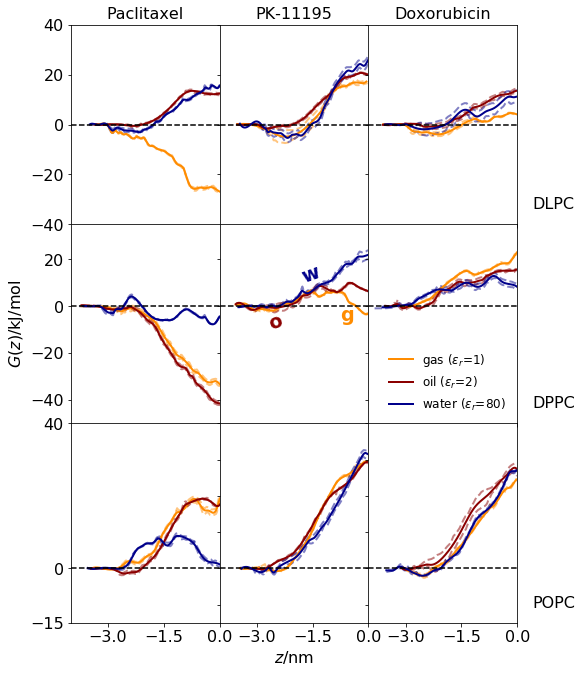

In [72]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8, 11]})
fig, ax = plt.subplots(3, 3,sharex=True)
#sharex=True, sharey=True
row=0
for drugname, data in db.items():
    lipiddata = data["PMF"]
    dG = -data["TD"].dG.sum()

    col = 0
    for lipidname, val in lipiddata.items():
        if col==0:
            ax[col,row].set_title(drugname, fontsize='medium')
        if row==0:
            
            ax[col,row].text(3.1, 0.1, lipidname, horizontalalignment='left', fontsize='medium',
                             verticalalignment='center', transform=ax[col,row].transAxes)
       
        if col==2 and row==1:
            ax[col,row].set_xlabel('$z$/nm')
        if row==0 and col==1:
            ax[col,row].set_ylabel('$G(z)$/$\mathrm{kJ/mol}$')  
        if col==0:
            r, G_g = plotPMF(ax[col,row], val["gas"], 0, color=gas_color)
            r, G_o = plotPMF(ax[col,row], val["oil"], 0,color=oil_color)
            r, G_w = plotPMF(ax[col,row], val["water"], 0,color=water_color)
            r, G_g = plotPMF1(ax[col,row], val["gas"], 0, color=gas_color, label='gas ($\u03B5_r$=1)')
            r, G_o = plotPMF1(ax[col,row], val["oil"], 0,color=oil_color, label='oil ($\u03B5_r$=2)')
            r, G_w = plotPMF1(ax[col,row], val["water"], 0,color=water_color, label='water ($\u03B5_r$=80)')
            ax[col,row].set_xlim(-4, 0)
            ax[col,row].set_ylim(-40, 40)
        
        if col==1:
            r, G_g = plotPMF(ax[col,row], val["gas"], 0, color=gas_color)
            r, G_o = plotPMF(ax[col,row], val["oil"], 0,color=oil_color)
            r, G_w = plotPMF(ax[col,row], val["water"], 0,color=water_color)
            r, G_g = plotPMF1(ax[col,row], val["gas"], 0, color=gas_color, label='gas ($\u03B5_r$=1)')
            r, G_o = plotPMF1(ax[col,row], val["oil"], 0,color=oil_color, label='oil ($\u03B5_r$=2)')
            r, G_w = plotPMF1(ax[col,row], val["water"], 0,color=water_color, label='water ($\u03B5_r$=80)')
            ax[col,row].set_xlim(-4, 0)
            ax[col,row].set_ylim(-50, 35)
            
        if col==2:
            r, G_g = plotPMF(ax[col,row], val["gas"], 0, color=gas_color)
            r, G_o = plotPMF(ax[col,row], val["oil"], 0,color=oil_color)
            r, G_w = plotPMF(ax[col,row], val["water"], 0,color=water_color)
            r, G_g = plotPMF1(ax[col,row], val["gas"], 0, color=gas_color, label='gas ($\u03B5_r$=1)')
            r, G_o = plotPMF1(ax[col,row], val["oil"], 0,color=oil_color, label='oil ($\u03B5_r$=2)')
            r, G_w = plotPMF1(ax[col,row], val["water"], 0,color=water_color, label='water ($\u03B5_r$=80)') 
            ax[col,0].set_xlim(-4, 0)
            ax[col,0].set_ylim(-15, 40)
            ax[col,1].set_xlim(-4, 0)
            ax[col,1].set_ylim(-15, 40)
            ax[col,2].set_xlim(-4, 0)
            ax[col,2].set_ylim(-15, 40)
            ax[2,0].set_yticks([-15,0, 40])
        
        
        ax[col,row].set_xlim(-4, 0)
        ax[col,row].axhline(y=0, color='k', linestyle='--', alpha=1)
        
        col = col + 1
    row = row + 1
    

ax[0,0].text(2.4, -5, 'w', color=water_color, fontsize='small', weight='bold')
ax[0,0].text(2.5, -6, 'g', color=gas_color, fontsize='small', weight='bold')
ax[0,0].text(2.5, -7, 'o', color=oil_color, fontsize='small', weight='bold')

ax[1,1].text(-1.85, 10, 'w', color=water_color, fontsize='large', weight='bold', rotation=20)
ax[1,1].text(-0.75, -6, 'g', color=gas_color, fontsize='large', weight='bold')
ax[1,1].text(-2.75, -10, 'o', color=oil_color, fontsize='large', weight='bold', rotation=20)


ax[0,1].set_yticklabels([])
ax[0,2].set_yticklabels([])
ax[1,1].set_yticklabels([])
ax[1,2].set_yticklabels([])
ax[2,1].set_yticklabels([])
ax[2,2].set_yticklabels([])

ax[2,2].set_xticks([-3, -1.5, 0])
ax[1,1].set_xticks([-3, -1.5, 0])


plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('FE-3k-j.pdf', bbox_inches='tight')


# Shifted Free energy

In [73]:
water_color = 'darkblue'
oil_color = 'darkred'
gas_color = 'black'


def offsetFreeEnergy(data, dG):
    data.sort_values(by=['r'], inplace=True)
    mask = (data.r<-3)
    offset = data[mask][0:5].mean().G
    a = deepcopy(data.to_numpy())
    a[:,1] = a[:,1] - offset + dG
    return a[:,0], a[:,1]

def offsetFreeEnergy1(data, dG):

    a = deepcopy(data.to_numpy())
    a[:,1] = a[:,1] 
    return a[:,0], a[:,1]




def plotPMF1(ax, data,data1,data2,dG,dG1, **kwargs):
    alpha=0.5
    
    x1, y1 = offsetFreeEnergy(data[0], dG)
    x2, y2 = offsetFreeEnergy(data[1], dG)
    
    x11, y11 = offsetFreeEnergy(data1[0], dG1)
    x22, y22 = offsetFreeEnergy(data1[1], dG1)
    
    
    x111, y111 = offsetFreeEnergy1(data2[0], dG1)
    x222, y222 = offsetFreeEnergy1(data2[1], dG1)

    spline1 = UnivariateSpline(x1, y1)
    spline2 = UnivariateSpline(x2, y2)
    spline1.set_smoothing_factor(k)
    spline2.set_smoothing_factor(k)
    
    spline11 = UnivariateSpline(x11, y11)
    spline22 = UnivariateSpline(x22, y22)
    spline11.set_smoothing_factor(k)
    spline22.set_smoothing_factor(k)
    
    spline111 = UnivariateSpline(x111, y111)
    spline222 = UnivariateSpline(x111, y111)
    spline111.set_smoothing_factor(0.0001)
    spline222.set_smoothing_factor(0.0001)
  
  
    # plot average data
    r = np.linspace(x1.min(), x1.max(), 500)
    avgspline = UnivariateSpline(r, 0.5*(spline1(r)+spline2(r)))
    avgspline.set_smoothing_factor(k)
    
    r1 = np.linspace(x11.min(), x11.max(), 500)
    avgspline1 = UnivariateSpline(r1, 0.5*(spline11(r1)+spline22(r1)))
    avgspline1.set_smoothing_factor(k)
    
    
    
    r11 = np.linspace(x111.min(), x111.max(), 500)
    avgspline11 = UnivariateSpline(r11, 0.5*(spline111(r11)+spline222(r11)))
    avgspline11.set_smoothing_factor(k)
    
    f = open( 'filexd.txt', 'w' )
    f.write( '\n'+ repr(r11) + '\n' )
    f.close()
    f1 = open( 'filexdd.txt', 'w' )
    f1.write( '\n'+ repr(avgspline11(r11)) + '\n' )
    f1.close()
    f2 = open( 'filexoil.txt', 'w' )
    f2.write( '\n'+ repr(r) + '\n' )
    f2.close()
    f3 = open( 'fileoiloil.txt', 'w' )
    f3.write( '\n'+ repr(avgspline11(r)) + '\n' )
    f3.close()
    ax.set_ylim(-20, 30)


    ryy=np.around(avgspline11(r11), 2)
    ry=np.around(avgspline11(r11), 2)
    ryy=avgspline11(r11)
    G_g=avgspline1(r1)*ryy
    G_w=avgspline(r)*(1-ry)
    G= G_w + G_g
    rr=0.5*(r1+r)
    G2=avgspline(r)
    G4=avgspline11(r11)
    G3=avgspline1(r1)
    rrr=(G2*(1-G4)+(G3*G4))
  
    G22=G2
    G33=G3
    G22=G22*G22
    G22=G22**0.5
    G33=G33*G33
    G33=G33**0.5
    aa= np.exp(-G22) *(1-G4)
   
    bb=np.exp(-G33)*(G4)
  
    cc=aa+bb
    
    cc=-np.log(cc)
 
    b=np.exp(-(G2*(1-G4)+(G3*G4)))
    dd=-np.log(b)
    
    ax.plot((r1+r)*0.5, (G2*(1-G4)+(G3*G4))*2.47, 'o',color="black", markevery=25, alpha=1, lw=2, fillstyle='none')
   

        
        
    return r11, avgspline11 # r, average PMF



def averagePMF(data, dG, k=0.5):
    ''' returns average PMF as a spline '''
    x1, y1 = offsetFreeEnergy(data[0], dG)
    x2, y2 = offsetFreeEnergy(data[1], dG)    
    spline1 = UnivariateSpline(x1, y1)
    spline2 = UnivariateSpline(x2, y2)
    spline1.set_smoothing_factor(k)
    spline2.set_smoothing_factor(k)
    x = np.linspace(x1.min(), x1.max(), 1000)
    avgspline = UnivariateSpline(x, 0.5*(spline1(x)+spline2(x)))
    avgspline.set_smoothing_factor(k)
    return x, avgspline # r, average PMF 



def plotPMF(ax, data, dG, **kwargs):
    alpha=0.5
    
    x1, y1 = offsetFreeEnergy(data[0], dG)
    x2, y2 = offsetFreeEnergy(data[1], dG)


    # the datasets have different x-spacing and we therefore
    # use splining to take the average
    k = 0.5 # spline smoothing factor
    spline1 = UnivariateSpline(x1, y1)
    spline2 = UnivariateSpline(x2, y2)
    spline1.set_smoothing_factor(k)
    spline2.set_smoothing_factor(k)
  
  
    # plot average data
    r = np.linspace(x1.min(), x1.max(), 500)
    avgspline = UnivariateSpline(r, 0.5*(spline1(r)+spline2(r)))
    avgspline.set_smoothing_factor(k)
    
   
    
    ax.plot(r, avgspline(r)*2.47, '-', **kwargs, lw=2, alpha=1.0 )  
       
    if (col==0 and row==0):
            bx2 = ax.twinx()
            xv=pd.read_excel(file,usecols=[1], sheet_name='wd-pcl').dropna()
            xw=pd.read_excel(file,usecols=[4], sheet_name='wd-pcl').dropna()
            yv=pd.read_excel(file,usecols=[2], sheet_name='wd-pcl').dropna()
            yw=pd.read_excel(file,usecols=[5], sheet_name='wd-pcl').dropna()
            
            bx2.plot(xw, yw,'--', alpha=alpha,color="steelblue")
            
            for label in bx2.get_yticklabels():
                label.set_color("steelblue")
                bx2.set_yticklabels([])
        
        
    if (col==1 and row==0):
            bx2 = ax.twinx()
            xv=pd.read_excel(file,usecols=[7], sheet_name='wd-pcl').dropna()
            xw=pd.read_excel(file,usecols=[10], sheet_name='wd-pcl').dropna()
            yv=pd.read_excel(file,usecols=[8], sheet_name='wd-pcl').dropna()
            yw=pd.read_excel(file,usecols=[11], sheet_name='wd-pcl').dropna()
           
            bx2.plot(xw, yw,'--', alpha=alpha,color="steelblue")
            for label in bx2.get_yticklabels():
                 label.set_color("steelblue")
                 bx2.set_yticklabels([])
            
        
    if (col==2 and row==0):
            bx2 = ax.twinx()
            xv=pd.read_excel(file,usecols=[13], sheet_name='wd-pcl').dropna()
            xw=pd.read_excel(file,usecols=[16], sheet_name='wd-pcl').dropna()
            yv=pd.read_excel(file,usecols=[14], sheet_name='wd-pcl').dropna()
            yw=pd.read_excel(file,usecols=[17], sheet_name='wd-pcl').dropna()
            
            bx2.plot(xw, yw,'--', alpha=alpha,color="steelblue")
            for label in bx2.get_yticklabels():
                 label.set_color("steelblue")
                 bx2.set_yticklabels([])
                    
                    
    if (col==0 and row==1):
            bx2 = ax.twinx()
            xv=pd.read_excel(file,usecols=[1], sheet_name='wd-pk').dropna()
            xw=pd.read_excel(file,usecols=[4], sheet_name='wd-pk').dropna()
            yv=pd.read_excel(file,usecols=[2], sheet_name='wd-pk').dropna()
            yw=pd.read_excel(file,usecols=[5], sheet_name='wd-pk').dropna()
          
            bx2.plot(xw, yw,'--', alpha=alpha, color="steelblue")
            for label in bx2.get_yticklabels():
                 label.set_color("steelblue")
                 bx2.set_yticklabels([])
        
        
    if (col==1 and row==1):
            bx2 = ax.twinx()
            xv=pd.read_excel(file,usecols=[7], sheet_name='wd-pk').dropna()
            xw=pd.read_excel(file,usecols=[10], sheet_name='wd-pk').dropna()
            yv=pd.read_excel(file,usecols=[8], sheet_name='wd-pk').dropna()
            yw=pd.read_excel(file,usecols=[11], sheet_name='wd-pk').dropna()
            bx2.plot(xw, yw,'--', alpha=alpha, color="steelblue")
            for label in bx2.get_yticklabels():
                 label.set_color("steelblue")
                 bx2.set_yticklabels([])
        
    if (col==2 and row==1):
            bx2 = ax.twinx()
            xv=pd.read_excel(file,usecols=[13], sheet_name='wd-pk').dropna()
            xw=pd.read_excel(file,usecols=[16], sheet_name='wd-pk').dropna()
            yv=pd.read_excel(file,usecols=[14], sheet_name='wd-pk').dropna()
            yw=pd.read_excel(file,usecols=[17], sheet_name='wd-pk').dropna()
            #bx2.plot(xv, yv, '*', alpha=0.2, **kwargs)
            bx2.plot(xw, yw,'--', alpha=alpha, color="steelblue")
            for label in bx2.get_yticklabels():
                label.set_color("steelblue") 
                bx2.set_yticklabels([])
               
        
    if (col==0 and row==2):
            bx2 = ax.twinx()
            xv=pd.read_excel(file,usecols=[1], sheet_name='wd-dox').dropna()
            xw=pd.read_excel(file,usecols=[4], sheet_name='wd-dox').dropna()
            yv=pd.read_excel(file,usecols=[2], sheet_name='wd-dox').dropna()
            yw=pd.read_excel(file,usecols=[5], sheet_name='wd-dox').dropna()
            bx2.plot(xw, yw,'--', alpha=alpha,color="steelblue")
            bx2.set_yticks([0, 1])
            for label in bx2.get_yticklabels():
                 label.set_color("steelblue")
            
        
    if (col==1 and row==2):
            bx2 = ax.twinx()
            xv=pd.read_excel(file,usecols=[7], sheet_name='wd-dox').dropna()
            xw=pd.read_excel(file,usecols=[10], sheet_name='wd-dox').dropna()
            yv=pd.read_excel(file,usecols=[8], sheet_name='wd-dox').dropna()
            yw=pd.read_excel(file,usecols=[11], sheet_name='wd-dox').dropna()
           
            bx2.plot(xw, yw,'--', alpha=alpha,color="steelblue")
            bx2.set_yticks([0, 1])
            for label in bx2.get_yticklabels():
                 label.set_color("steelblue")
            bx2.set_ylabel('$Water\ density$/$\ \mathrm{g/cm^3}$',color="steelblue")
        
    if (col==2 and row==2):
            bx2 = ax.twinx()
            xv=pd.read_excel(file,usecols=[13], sheet_name='wd-dox').dropna()
            xw=pd.read_excel(file,usecols=[16], sheet_name='wd-dox').dropna()
            yv=pd.read_excel(file,usecols=[14], sheet_name='wd-dox').dropna()
            yw=pd.read_excel(file,usecols=[17], sheet_name='wd-dox').dropna()
            
            bx2.plot(xw, yw,'--', alpha=alpha, color="steelblue")
            bx2.set_yticks([0, 1])
            for label in bx2.get_yticklabels():
                 label.set_color("steelblue") 
           
    return r, avgspline # r, average PMF
    
def BoltzmannAverage(ax, r, G_w, G_o):
    G = -np.log(np.exp(-G_w) + np.exp(-G_o))
    i=0
    r1=r

    for i in range(len(r)):
 
        if r[i]>-2.6:  
            G2=-np.log(np.exp(-G_o))
         
            global midxxx
            global midx
            midxxx=np.append(midxxx,G2[i])
            midx=np.append(midx,r[i])
    
        if r1[i]<-2.5:
            G3=-np.log(np.exp(-G_w))
            global midxy
            global midy
            midxy=np.append(midxy,G3[i])
            midy=np.append(midy,r1[i])
            


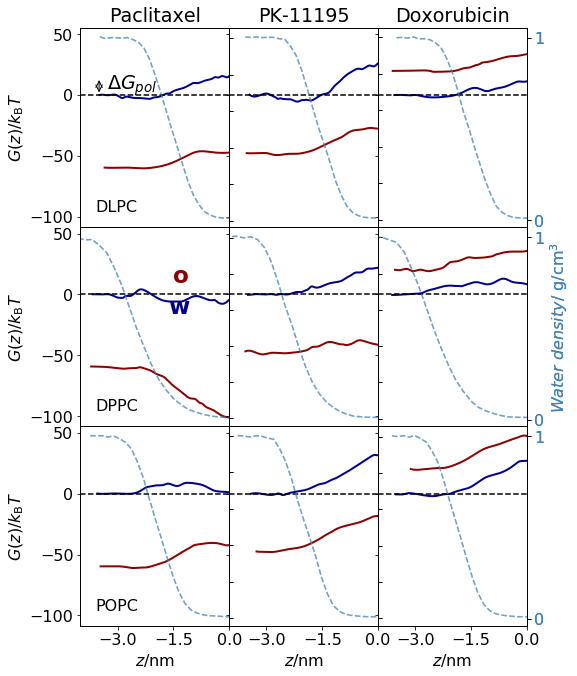

In [74]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8, 11]})
fig, ax = plt.subplots(3, 3,sharex=True, sharey=True)
#
row=0
for drugname, data in db.items():
    lipiddata = data["PMF"]
    dG = -data["TD"].dG.sum()

    col = 0
    for lipidname, val in lipiddata.items():
        if col==0:
            ax[col,row].set_title(drugname, fontsize='large')
        if row==0:
            ax[col,row].set_ylabel('$G(z)$/$k_{\mathrm{B}}T$')
            ax[col,row].text(0.1, 0.1, lipidname, horizontalalignment='left', fontsize='medium',
                             verticalalignment='center', transform=ax[col,row].transAxes)
        if col==2:
            ax[col,row].set_xlabel('$z$/nm')
        #r, G_g = plotPMF(ax[col,row], val["gas"], 0, color=gas_color, label='g')
        r, G_o = plotPMF(ax[col,row], val["oil"], dG,color=oil_color, label='oil')
        f = open( 'filexoil.txt', 'w' )
        f.write( '\n'+ repr(r) + '\n' )
        f.close()
        f = open( 'fileoiloil.txt', 'w' )
        f.write( '\n'+ repr(G_o) + '\n' )
        f.close()
        r, G_w = plotPMF(ax[col,row], val["water"], 0,color=water_color, label='w')
        #r, G_d = plotPMF1(ax[col,row], val["water"],val["water"],val["d"], 0,color=water_color, label='w')
        f = open( 'filexw.txt', 'w' )
        f.write( '\n'+ repr(r) + '\n' )
        f.close()
        f = open( 'fileww.txt', 'w' )
        f.write( '\n'+ repr(G_w) + '\n' )
        f.close()
       
        
        #BoltzmannAverage(ax[col,row], r, G_w(r), G_o(r))
        ax[col,row].set_xlim(-4, 0)
        ax[col,row].axhline(y=0, color='k', linestyle='--', alpha=1)
        
        col = col + 1
    row = row + 1
    
ax[0,0].annotate("", xy=(-3.5, 0.5), xytext=(-3.5,14),
             arrowprops=dict(arrowstyle="<->", connectionstyle="arc3"))
ax[0,0].text(-3.3, 4.5, r'$\Delta G_{pol}$', fontsize='large')
ax[1,0].text(-1.65, -16, 'w', color=water_color, fontsize='x-large', weight='bold')
ax[1,0].text(-1.5, 10, 'o', color=oil_color, fontsize='x-large', weight='bold')
ax[2,2].set_xticks([-3, -1.5, 0])
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('FE-shifted.pdf', bbox_inches='tight')


# Charge Switching

In [5]:
water_color = 'darkblue'
oil_color = 'darkred'
gas_color = 'black'

from scipy.ndimage.filters import gaussian_filter1d
from scipy.signal import savgol_filter
def offsetFreeEnergy(data, dG):
    data.sort_values(by=['r'], inplace=True)
    mask = (data.r<-3)
    offset = data[mask][0:5].mean().G
    a = deepcopy(data.to_numpy())
    a[:,1] = a[:,1] - offset + dG
    return a[:,0], a[:,1]

def offsetFreeEnergy1(data, dG):

    a = deepcopy(data.to_numpy())
    a[:,1] = a[:,1] 
    return a[:,0], a[:,1]


def colorlist(color1, color2, num):
    """Generate list of num colors blending from color1 to color2"""
    result = [np.array(color1), np.array(color2)]
    while len(result) < num:
        temp = [result[0]]
        for i in range(len(result)-1):
            temp.append(np.sqrt((result[i]**2+result[i+1]**2)/2))
            temp.append(result[i+1])
        result = temp
    indices = np.linspace(0, len(result)-1, num).round().astype(int)
    return [result[i] for i in indices]

def plotPMF1(ax, data,data1,data2,dG,dG1, **kwargs):
    alpha=0.5
    
    x1, y1 = offsetFreeEnergy(data[0], dG)
    x2, y2 = offsetFreeEnergy(data[1], dG)
    
    x11, y11 = offsetFreeEnergy(data1[0], dG1)
    x22, y22 = offsetFreeEnergy(data1[1], dG1)
    
    
    x111, y111 = offsetFreeEnergy1(data2[0], dG1)
    x222, y222 = offsetFreeEnergy1(data2[1], dG1)
 

    # the datasets have different x-spacing and we therefore
    # use splining to take the average
    k = 0.5 # spline smoothing factor
    spline1 = UnivariateSpline(x1, y1)
    spline2 = UnivariateSpline(x2, y2)
    spline1.set_smoothing_factor(k)
    spline2.set_smoothing_factor(k)
    
    spline11 = UnivariateSpline(x11, y11)
    spline22 = UnivariateSpline(x22, y22)
    spline11.set_smoothing_factor(k)
    spline22.set_smoothing_factor(k)
    
    spline111 = UnivariateSpline(x111, y111)
    spline222 = UnivariateSpline(x111, y111)
    spline111.set_smoothing_factor(0.0001)
    spline222.set_smoothing_factor(0.0001)
  
  
    # plot average data
    r = np.linspace(x1.min(), x1.max(), 30)
    avgspline = UnivariateSpline(r, 0.5*(spline1(r)+spline2(r)))
    avgspline.set_smoothing_factor(k)
    
    r1 = np.linspace(x11.min(), x11.max(), 30)
    avgspline1 = UnivariateSpline(r1, 0.5*(spline11(r1)+spline22(r1)))
    avgspline1.set_smoothing_factor(k)
    
    
    
    r11 = np.linspace(x111.min(), x111.max(), 30)
    avgspline11 = UnivariateSpline(r11, 0.5*(spline111(r11)+spline222(r11)))
    avgspline11.set_smoothing_factor(k)
    
    f = open( 'filexd.txt', 'w' )
    f.write( '\n'+ repr(r11) + '\n' )
    f.close()
    f1 = open( 'filexdd.txt', 'w' )
    f1.write( '\n'+ repr(avgspline11(r11)) + '\n' )
    f1.close()
    f2 = open( 'filexoil.txt', 'w' )
    f2.write( '\n'+ repr(r) + '\n' )
    f2.close()
    f3 = open( 'fileoiloil.txt', 'w' )
    f3.write( '\n'+ repr(avgspline11(r)) + '\n' )
    f3.close()
    ax.set_ylim(-20, 30)

    ryy=np.around(avgspline11(r11), 2)
    ry=np.around(avgspline11(r11), 2)
    ryy=avgspline11(r11)
    G_g=avgspline1(r1)*ryy
    G_w=avgspline(r)*(1-ry)
   
    G= G_w + G_g
    rr=0.5*(r1+r)
    G2=avgspline(r)
    G4=avgspline11(r11)
    G3=avgspline1(r1)
    
    rr=savgol_filter(rr, 19, 8)
    rrr=savgol_filter((G2*(1-G4)+(G3*G4)), 19, 8)
    rrr=(G2*(1-G4)+(G3*G4))*2.47
    
    colors1 = colorlist((0, 0.9, 1), (1, 0, 0), len(rr))

    for i in range(len(rr)-1):
        xi = rr[i:i+1+1]
        yi = rrr[i:i+1+1]
        ci = colors1[i]
        ax.plot(xi, yi, color=ci, linestyle='solid', linewidth='3.5')
    
    
        
    return r11, avgspline11 # r, average PMF


   

def plotPMF(ax, data, dG, **kwargs):
    alpha=0.5
    
    x1, y1 = offsetFreeEnergy(data[0], dG)
    x2, y2 = offsetFreeEnergy(data[1], dG)


    # the datasets have different x-spacing and we therefore
    # use splining to take the average
    k = 0.5 # spline smoothing factor
    spline1 = UnivariateSpline(x1, y1)
    spline2 = UnivariateSpline(x2, y2)
    spline1.set_smoothing_factor(k)
    spline2.set_smoothing_factor(k)
  
  
    # plot average data
    r = np.linspace(x1.min(), x1.max(), 30)
    avgspline = UnivariateSpline(r, 0.5*(spline1(r)+spline2(r)))
    avgspline.set_smoothing_factor(k)
    rr=savgol_filter(r, 19, 8)
    rrr=savgol_filter(avgspline(r), 19, 8)
    
    ax.plot(rr, rrr*2.47, '-', **kwargs, lw=3.5, alpha=1 ) 

   
        
    return r, avgspline # r, average PMF

   


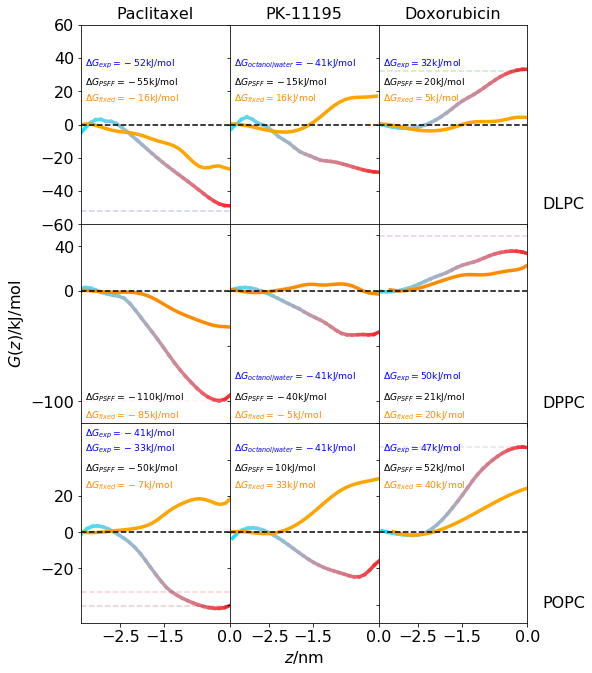

In [76]:
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8, 11]})
fig, ax = plt.subplots(3, 3,sharex=True)
row=0
for drugname, data in db.items():
    lipiddata = data["PMF"]
    dG = -data["TD"].dG.sum()
    dG1=0

    col = 0
    for lipidname, val in lipiddata.items():
        if col==0:
            ax[col,row].set_title(drugname, fontsize='medium')
        if row==0 and col==1:
            ax[col,row].set_ylabel('$G(z)$/$\mathrm{kJ/mol}$')
        if row==0:    
            ax[col,row].text(3.1, 0.1, lipidname, horizontalalignment='left', fontsize='medium',
                             verticalalignment='center', transform=ax[col,row].transAxes)
        if col==2 and row==1:
            ax[col,row].set_xlabel('$z$/nm')
        if col==0:    
            r, G_g = plotPMF1(ax[col,row], val["oil"],val["water"],val["d"], dG,dG1, color=gas_color, label='g')
        
            r, G_w = plotPMF(ax[col,row], val["gas"], 0, color="orange", label='g')
            ax[col,row].set_xlim(-3.2, 0)
            ax[col,row].set_ylim(-60, 60)
            ax[col,row].axhline(y=0, color='k', linestyle='--', alpha=1)
    
    
        if col==2:    
            r, G_g = plotPMF1(ax[col,row], val["oil"],val["water"],val["d"], dG,dG1, color=gas_color, label='g')
       
            r, G_w = plotPMF(ax[col,row], val["gas"], 0, color="orange", label='g')
            ax[col,0].set_xlim(-3.4, 0)
            ax[col,0].set_ylim(-50, 60)
            ax[col,1].set_xlim(-3.4, 0)
            ax[col,1].set_ylim(-50, 60)
            ax[col,2].set_xlim(-3.4, 0)
            ax[col,2].set_ylim(-50, 60)
            ax[2,0].set_yticks([-20,0, 20])
            ax[col,row].axhline(y=0, color='k', linestyle='--', alpha=1)
    
    
    
    
        if col==1:    
            r, G_g = plotPMF1(ax[col,row], val["oil"],val["water"],val["d"], dG,dG1, color=gas_color, label='g')
       
            r, G_w = plotPMF(ax[col,row], val["gas"], 0, color="darkorange", label='g')
            ax[col,row].set_xlim(-3.2, 0)
            ax[col,row].set_ylim(-120, 60)
            ax[1,0].set_yticks([-100,0, 40])
            ax[col,row].axhline(y=0, color='k', linestyle='--', alpha=1)
      
 
        f = open( 'filexd.txt', 'w' )
        f.write( '\n'+ repr(r) + '\n' )
        f.close()
        f = open( 'filexdd.txt', 'w' )
        f.write( '\n'+ repr(G_o) + '\n' )
        f.close()
       
        

        
        col = col + 1
    row = row + 1
    

ax[2,2].set_xticks([-2.5, -1.5, 0])


ax[0,1].set_yticklabels([])
ax[0,2].set_yticklabels([])
ax[1,1].set_yticklabels([])
ax[1,2].set_yticklabels([])
ax[2,1].set_yticklabels([])
ax[2,2].set_yticklabels([])
plt.subplots_adjust(wspace=0, hspace=0)
ax[0,0].axhline(y=-52.04, color='blue', linestyle='--', alpha=.2)
ax[2,0].axhline(y=-40.78, color='darkred', linestyle='--', alpha=.2)
ax[2,0].axhline(y=-33, color='red', linestyle='--', alpha=.2)
ax[1,2].axhline(y=49.52, color='purple', linestyle='--', alpha=.2)
ax[0,2].axhline(y=32.29, color='green', linestyle='--', alpha=.2)
ax[2,2].axhline(y=46.89, color='gray', linestyle='--', alpha=.2)


ax[1,0].axhline(y=-100, color='pink', linestyle='--', alpha=.2)
ax[0,0].text(-3.3, 35, r'$\Delta G_{exp}=-52 \mathrm{kJ/mol}$', color="blue", fontsize='xx-small')
ax[0,0].text(-3.3, 24.2, r'$\Delta G_{PSFF}=-55 \mathrm{kJ/mol}$', color="black", fontsize='xx-small')
ax[0,0].text(-3.3, 14.4, r'$\Delta G_{fixed}=-16 \mathrm{kJ/mol}$', color="darkorange", fontsize='xx-small')

ax[0,1].text(-3.3, 35, r'$\Delta G_{octanol/water}=-41 \mathrm{kJ/mol}$', color="blue", fontsize='xx-small')
ax[0,1].text(-3.3, 24.2, r'$\Delta G_{PSFF}=-15 \mathrm{kJ/mol}$', color="black", fontsize='xx-small')
ax[0,1].text(-3.3, 14.4, r'$\Delta G_{fixed}=16 \mathrm{kJ/mol}$', color="darkorange", fontsize='xx-small')

ax[0,2].text(-3.3, 35, r'$\Delta G_{exp}=32 \mathrm{kJ/mol}$', color="blue", fontsize='xx-small')
ax[0,2].text(-3.3, 24.2, r'$\Delta G_{PSFF}=20 \mathrm{kJ/mol}$', color="black", fontsize='xx-small')
ax[0,2].text(-3.3, 14.4, r'$\Delta G_{fixed}=5 \mathrm{kJ/mol}$', color="darkorange", fontsize='xx-small')


ax[1,0].text(-3.3, -98.2, r'$\Delta G_{PSFF}=-110 \mathrm{kJ/mol}$', color="black", fontsize='xx-small')
ax[1,0].text(-3.3, -114.4, r'$\Delta G_{fixed}=-85 \mathrm{kJ/mol}$', color="darkorange", fontsize='xx-small')

ax[1,1].text(-3.3, -80, r'$\Delta G_{octanol/water}=-41 \mathrm{kJ/mol}$', color="blue", fontsize='xx-small')
ax[1,1].text(-3.3, -98.2, r'$\Delta G_{PSFF}=-40 \mathrm{kJ/mol}$', color="black", fontsize='xx-small')
ax[1,1].text(-3.3, -114.4, r'$\Delta G_{fixed}=-5 \mathrm{kJ/mol}$', color="darkorange", fontsize='xx-small')

ax[1,2].text(-3.3, -80, r'$\Delta G_{exp}=50 \mathrm{kJ/mol}$', color="blue", fontsize='xx-small')
ax[1,2].text(-3.3, -98.2, r'$\Delta G_{PSFF}=21 \mathrm{kJ/mol}$', color="black", fontsize='xx-small')
ax[1,2].text(-3.3, -114.4, r'$\Delta G_{fixed}=20 \mathrm{kJ/mol}$', color="darkorange", fontsize='xx-small')


ax[2,0].text(-3.3, 53, r'$\Delta G_{exp}=-41 \mathrm{kJ/mol}$', color="blue", fontsize='xx-small')
ax[2,0].text(-3.3, 45, r'$\Delta G_{exp}=-33 \mathrm{kJ/mol}$', color="blue", fontsize='xx-small')
ax[2,0].text(-3.3, 34.2, r'$\Delta G_{PSFF}=-50 \mathrm{kJ/mol}$', color="black", fontsize='xx-small')
ax[2,0].text(-3.3, 24.4, r'$\Delta G_{fixed}=-7 \mathrm{kJ/mol}$', color="darkorange", fontsize='xx-small')

ax[2,1].text(-3.3, 45, r'$\Delta G_{octanol/water}=-41 \mathrm{kJ/mol}$', color="blue", fontsize='xx-small')
ax[2,1].text(-3.3, 34.2, r'$\Delta G_{PSFF}=10 \mathrm{kJ/mol}$', color="black", fontsize='xx-small')
ax[2,1].text(-3.3, 24.4, r'$\Delta G_{fixed}=33 \mathrm{kJ/mol}$', color="darkorange", fontsize='xx-small')

ax[2,2].text(-3.3, 45, r'$\Delta G_{exp}=47 \mathrm{kJ/mol}$', color="blue", fontsize='xx-small')
ax[2,2].text(-3.3, 34.2, r'$\Delta G_{PSFF}=52 \mathrm{kJ/mol}$', color="black", fontsize='xx-small')
ax[2,2].text(-3.3, 24.4, r'$\Delta G_{fixed}=40 \mathrm{kJ/mol}$', color="darkorange", fontsize='xx-small')


plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('FE-F-Mk-j.pdf', bbox_inches='tight',transparent=True)
